<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/M1F4_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#✓ Import train.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
train.head()

num      date_time  전력사용량(kWh)  기온(°C)  ...  강수량(mm)  일조(hr)  비전기냉방설비운영  태양광보유
0    1  2020-06-01 00    8179.056    17.6  ...      0.8     0.0        0.0    0.0
1    1  2020-06-01 01    8135.640    17.7  ...      0.3     0.0        0.0    0.0
2    1  2020-06-01 02    8107.128    17.5  ...      0.0     0.0        0.0    0.0
3    1  2020-06-01 03    8048.808    17.1  ...      0.0     0.0        0.0    0.0
4    1  2020-06-01 04    8043.624    17.0  ...      0.0     0.0        0.0    0.0

[5 rows x 10 columns]

* num : 건물번호
* date_time : 시간

In [4]:
train.columns = ['num','datetime','usage','temperature','windspeed','humidity','precipitation','sunshine','non_elec_fac','solar_fac']

* train 데이터의 column 명을 영어로 변경

#✓ EDA

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import *
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

* 버전이 업데이트 되었거나, 더 좋은 방법을 추천해 주기 위해서 뜨는 경고창 혹은, 런타임 에러 등 다양한 이유로 발생하는 경고창을 무시

In [6]:
eda = train.copy()

* train 데이터를 보존하기 위해 eda 데이터로 복사

In [7]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            122400 non-null  int64  
 1   datetime       122400 non-null  object 
 2   usage          122400 non-null  float64
 3   temperature    122400 non-null  float64
 4   windspeed      122400 non-null  float64
 5   humidity       122400 non-null  float64
 6   precipitation  122400 non-null  float64
 7   sunshine       122400 non-null  float64
 8   non_elec_fac   122400 non-null  float64
 9   solar_fac      122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


* 모든 column에 null값이 존재하지 않음

In [8]:
eda['num'].value_counts()

60    2040
59    2040
28    2040
27    2040
26    2040
25    2040
24    2040
23    2040
22    2040
21    2040
20    2040
19    2040
18    2040
17    2040
16    2040
15    2040
14    2040
13    2040
12    2040
11    2040
10    2040
9     2040
8     2040
7     2040
6     2040
5     2040
4     2040
3     2040
2     2040
29    2040
30    2040
31    2040
46    2040
58    2040
57    2040
56    2040
55    2040
54    2040
53    2040
52    2040
51    2040
50    2040
49    2040
48    2040
47    2040
45    2040
32    2040
44    2040
43    2040
42    2040
41    2040
40    2040
39    2040
38    2040
37    2040
36    2040
35    2040
34    2040
33    2040
1     2040
Name: num, dtype: int64

* 'num' column은 1부터 60까지의 값을 각각 2040개 갖음

###✓ Meaning of 0s

In [9]:
print(len(eda[eda['sunshine']==0.0]), len(eda[eda['non_elec_fac']==0.0]), len(eda[eda['solar_fac']==0.0]))

85394 38760 63240


* 'sunshine' column은 85394개, 'non\_elec\_fac' column은 38760개, 'solar_fac' column은 63240개의 0을 갖음

In [10]:
eda['sunshine'].value_counts()

0.0    85394
1.0    15137
0.1     3376
0.9     3361
0.8     2385
0.7     2306
0.2     2228
0.3     2216
0.6     2083
0.4     2024
0.5     1890
Name: sunshine, dtype: int64

* 'sunshine' column은 0.0에서 1.0까지의 값을 0.1간격으로 각각 위와 같은 개수로 갖음

In [11]:
non_ele = eda.groupby('num')['non_elec_fac'].unique()
non_ele

num
1     [0.0]
2     [1.0]
3     [1.0]
4     [1.0]
5     [1.0]
6     [0.0]
7     [1.0]
8     [1.0]
9     [0.0]
10    [1.0]
11    [0.0]
12    [1.0]
13    [1.0]
14    [1.0]
15    [1.0]
16    [1.0]
17    [1.0]
18    [0.0]
19    [0.0]
20    [0.0]
21    [0.0]
22    [1.0]
23    [0.0]
24    [1.0]
25    [1.0]
26    [0.0]
27    [1.0]
28    [1.0]
29    [0.0]
30    [1.0]
31    [1.0]
32    [0.0]
33    [1.0]
34    [1.0]
35    [1.0]
36    [0.0]
37    [1.0]
38    [1.0]
39    [1.0]
40    [1.0]
41    [1.0]
42    [1.0]
43    [1.0]
44    [1.0]
45    [0.0]
46    [1.0]
47    [1.0]
48    [0.0]
49    [0.0]
50    [0.0]
51    [0.0]
52    [1.0]
53    [1.0]
54    [1.0]
55    [1.0]
56    [0.0]
57    [1.0]
58    [1.0]
59    [1.0]
60    [1.0]
Name: non_elec_fac, dtype: object

* 'non\_elec\_fac' column은 'num'을 기준으로 나눴을 때 각각의 'num'에 대하여 0.0또는 1.0의 값을 갖음

In [12]:
eda.groupby('num')['non_elec_fac'].mean().value_counts()

1.0    41
0.0    19
Name: non_elec_fac, dtype: int64

* 'non\_elec\_fac' column은 'num'을 기준으로 나눴을 때, 41개의 1.0과 19개의 0.0의 값을 갖음

In [13]:
sun = eda.groupby('num')['solar_fac'].unique()
sun

num
1     [0.0]
2     [0.0]
3     [1.0]
4     [1.0]
5     [0.0]
6     [0.0]
7     [0.0]
8     [1.0]
9     [1.0]
10    [0.0]
11    [0.0]
12    [1.0]
13    [0.0]
14    [1.0]
15    [0.0]
16    [1.0]
17    [0.0]
18    [0.0]
19    [0.0]
20    [0.0]
21    [1.0]
22    [0.0]
23    [1.0]
24    [1.0]
25    [0.0]
26    [1.0]
27    [1.0]
28    [0.0]
29    [0.0]
30    [1.0]
31    [0.0]
32    [0.0]
33    [0.0]
34    [1.0]
35    [0.0]
36    [1.0]
37    [1.0]
38    [1.0]
39    [1.0]
40    [1.0]
41    [0.0]
42    [1.0]
43    [1.0]
44    [1.0]
45    [1.0]
46    [0.0]
47    [1.0]
48    [0.0]
49    [0.0]
50    [0.0]
51    [1.0]
52    [1.0]
53    [0.0]
54    [0.0]
55    [1.0]
56    [1.0]
57    [0.0]
58    [0.0]
59    [0.0]
60    [1.0]
Name: solar_fac, dtype: object

* 'solar_fac' column은 'num'을 기준으로 나눴을 때 각각의 'num'에 대하여 0.0또는 1.0의 값을 갖음

In [14]:
eda.groupby('num')['solar_fac'].mean().value_counts()

0.0    31
1.0    29
Name: solar_fac, dtype: int64

* 'solar_fac' column은 'num'을 기준으로 나눴을 때, 29개의 1.0과 31개의 0.0의 값을 갖음

###✓ Check time series data

In [15]:
eda['datetime'] = pd.to_datetime(eda['datetime'])
eda['hour'] = eda['datetime'].dt.hour
eda['weekday'] = eda['datetime'].dt.weekday
eda['date'] = eda['datetime'].dt.date
eda['day'] = eda['datetime'].dt.day
eda['month'] = eda['datetime'].dt.month
eda['weekend'] = eda['weekday'].isin([5,6]).astype(int)

In [16]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   datetime       122400 non-null  datetime64[ns]
 2   usage          122400 non-null  float64       
 3   temperature    122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sunshine       122400 non-null  float64       
 8   non_elec_fac   122400 non-null  float64       
 9   solar_fac      122400 non-null  float64       
 10  hour           122400 non-null  int64         
 11  weekday        122400 non-null  int64         
 12  date           122400 non-null  object        
 13  day            122400 non-null  int64         
 14  month          122400 non-null  int64         
 15  

* 'datetime' column행의 데이터 유형을 datetime64[ns]로 변경
* datetime64[ns] 유형의 데이터를 이용하여 'hour', 'weekday', 'date', 'day', 'month', 'weekend' column 생성
* 'weekday' column은 주중 데이터에 대하여 0, 주말 데이터에 대하여 1의 값을 갖음

In [17]:
eda.set_index('datetime', inplace=True)
eda.head()

num     usage  temperature  ...  day  month  weekend
datetime                                         ...                     
2020-06-01 00:00:00    1  8179.056         17.6  ...    1      6        0
2020-06-01 01:00:00    1  8135.640         17.7  ...    1      6        0
2020-06-01 02:00:00    1  8107.128         17.5  ...    1      6        0
2020-06-01 03:00:00    1  8048.808         17.1  ...    1      6        0
2020-06-01 04:00:00    1  8043.624         17.0  ...    1      6        0

[5 rows x 15 columns]

In [18]:
eda_num1 = eda[eda['num']==1]
eda_num1.asfreq('H')

num     usage  temperature  ...  day  month  weekend
datetime                                         ...                     
2020-06-01 00:00:00    1  8179.056         17.6  ...    1      6        0
2020-06-01 01:00:00    1  8135.640         17.7  ...    1      6        0
2020-06-01 02:00:00    1  8107.128         17.5  ...    1      6        0
2020-06-01 03:00:00    1  8048.808         17.1  ...    1      6        0
2020-06-01 04:00:00    1  8043.624         17.0  ...    1      6        0
...                  ...       ...          ...  ...  ...    ...      ...
2020-08-24 19:00:00    1  8714.952         29.4  ...   24      8        0
2020-08-24 20:00:00    1  8740.224         28.7  ...   24      8        0
2020-08-24 21:00:00    1  8730.504         28.3  ...   24      8        0
2020-08-24 22:00:00    1  8725.968         28.3  ...   24      8        0
2020-08-24 23:00:00    1  8705.232         28.1  ...   24      8        0

[2040 rows x 15 columns]

In [19]:
eda_num1.asfreq('H').isna().sum()

num              0
usage            0
temperature      0
windspeed        0
humidity         0
precipitation    0
sunshine         0
non_elec_fac     0
solar_fac        0
hour             0
weekday          0
date             0
day              0
month            0
weekend          0
dtype: int64

* 'datetime' column을 1시간 단위로 채우고 null값을 측정

In [20]:
eda.reset_index(inplace=True)

###✓ Usage between buildings

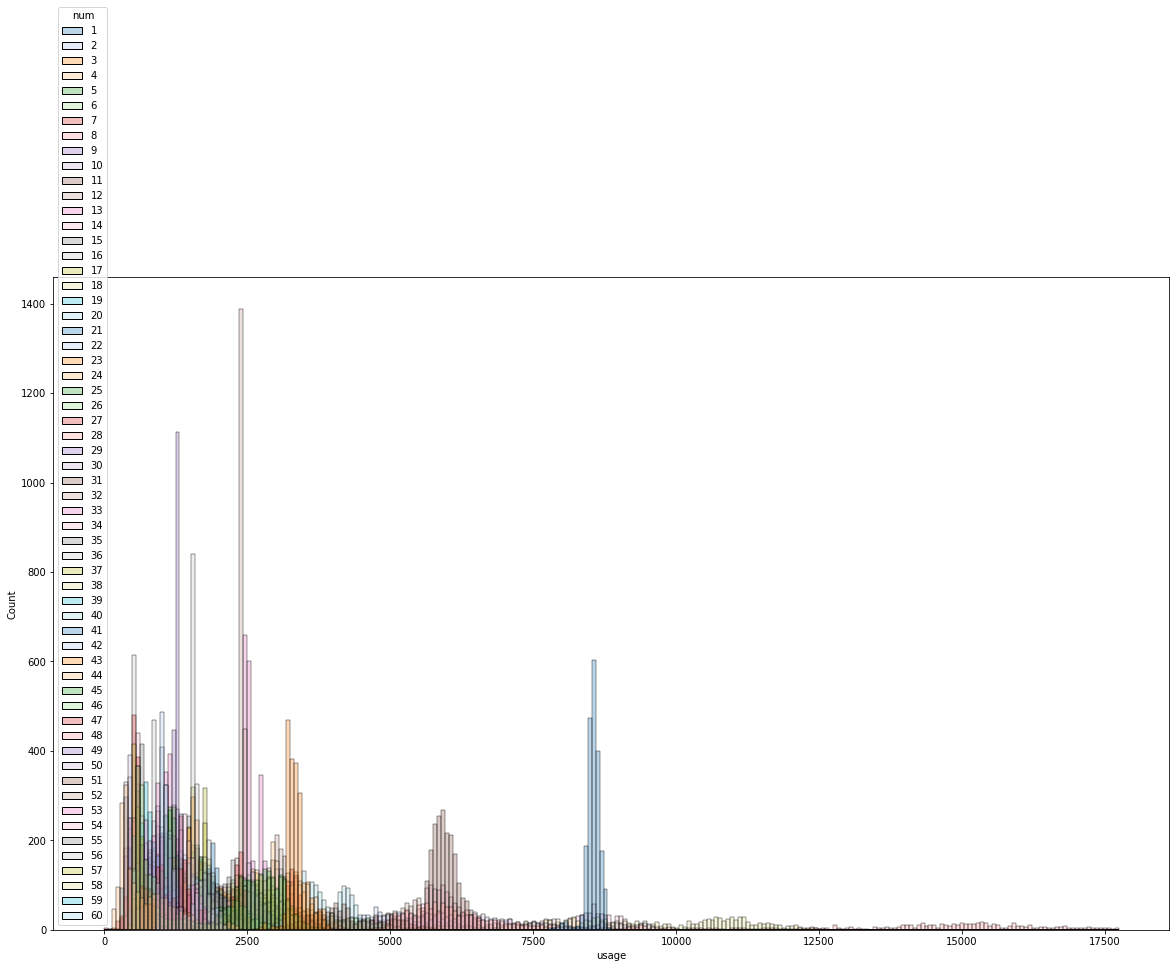

In [21]:
fig = plt.figure(figsize = (20, 12))
sns.histplot(data=eda, x='usage', hue = 'num', alpha = 0.3, palette = 'tab20')
plt.show()

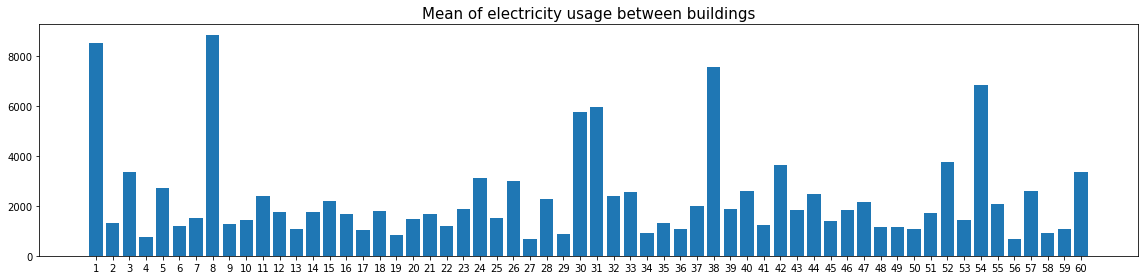

In [22]:
usage_summary = eda.pivot_table(values = 'usage', index = 'num', aggfunc = np.mean)  # index 항목별 values의 aggfunc을 계산(여기에서는 num 항목별 usage의 평균을 계산)

plt.figure(figsize = (16, 4))
plt.bar(usage_summary.index, usage_summary.usage)
plt.title('Mean of electricity usage between buildings', fontsize = 15)
plt.xticks(list(range(1,61)))
plt.tight_layout()
plt.show()

* 건물마다 usage의 scale에 차이가 있음

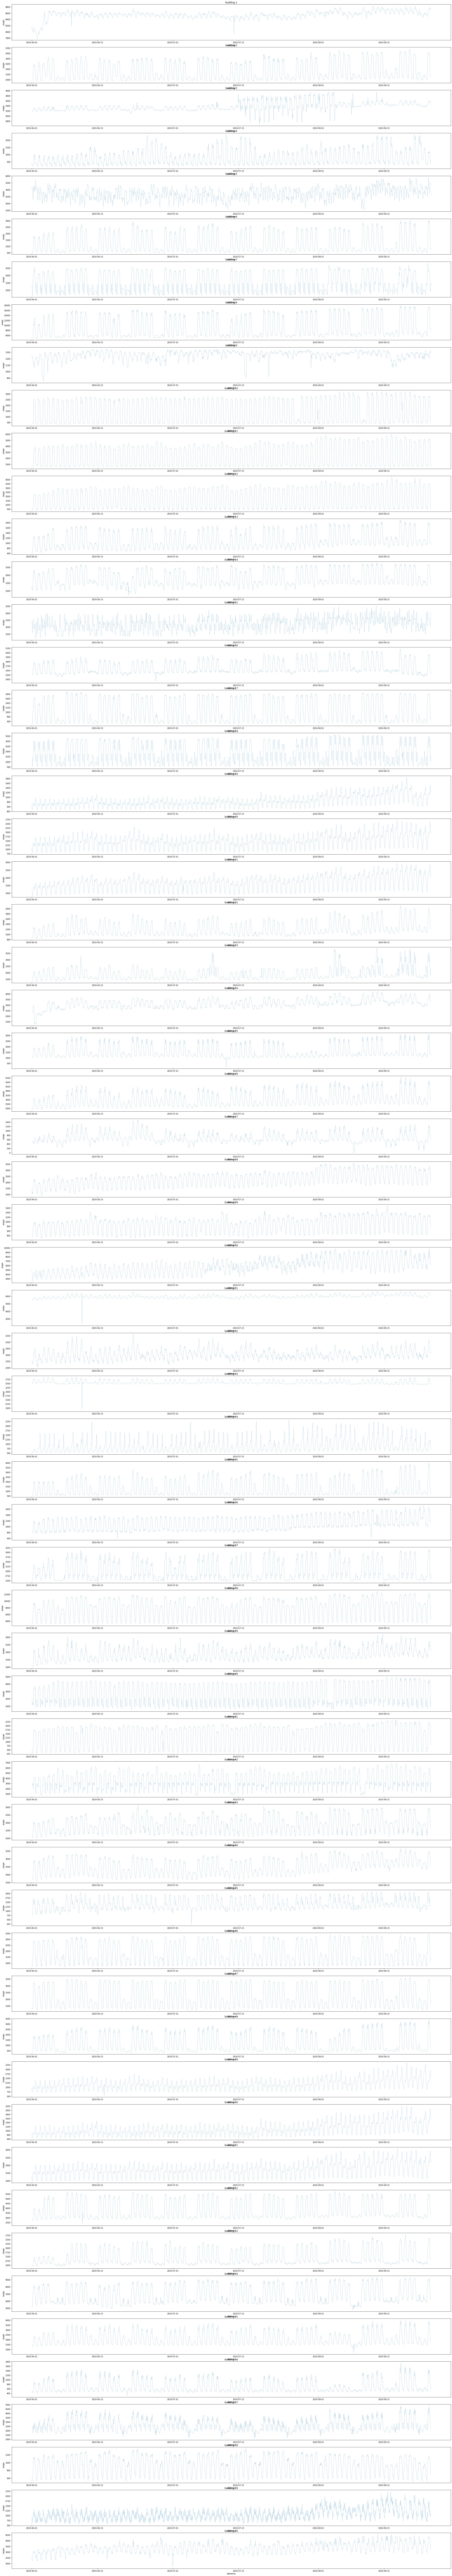

In [24]:
fig = plt.figure(figsize = (40, 240))
for i in eda['num'].unique():
    num_i = eda[eda.num == i]
    plt.subplot(60, 1, i)
    sns.lineplot(data = num_i, x = 'datetime', y = 'usage', linewidth = 0.3)
    plt.title(f'building {i}')

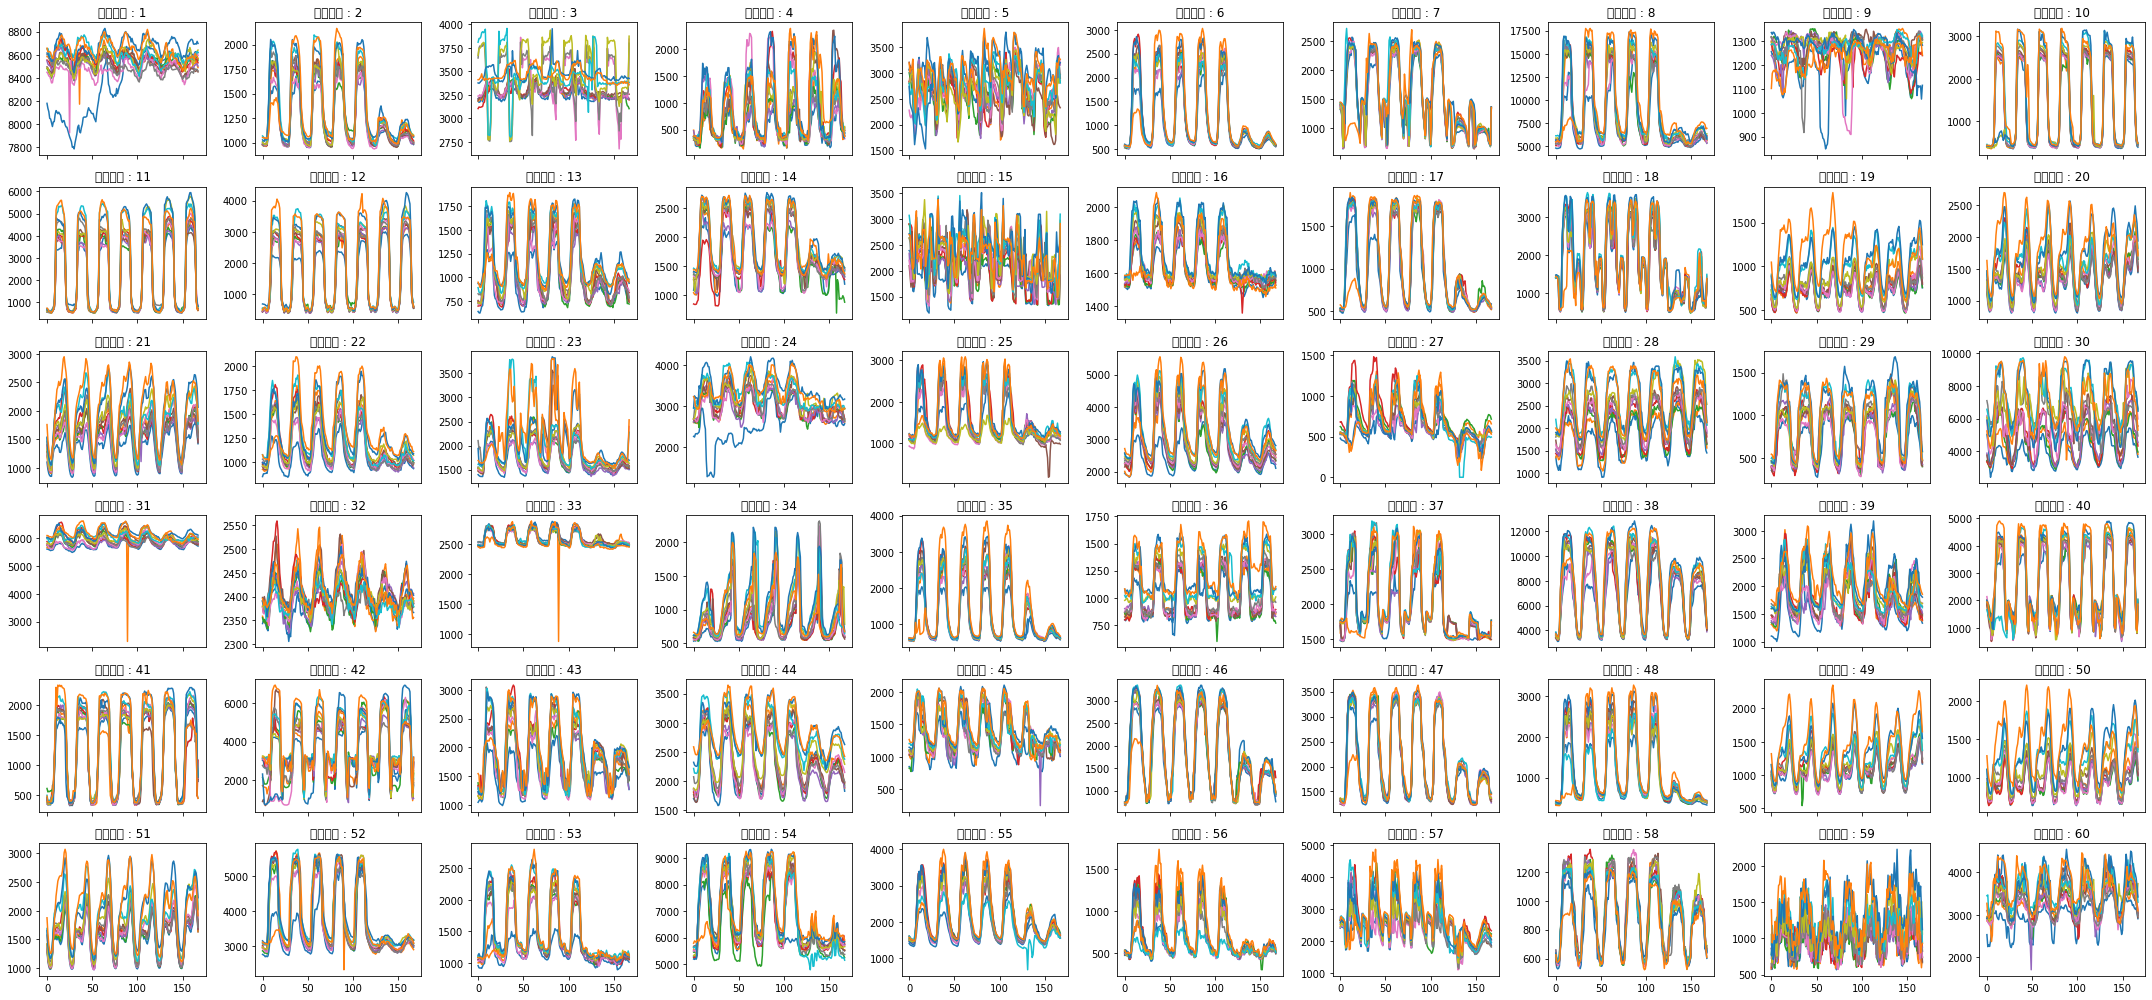

In [23]:
# energy usage of each building ~ weekday, hour
fig, axes = plt.subplots(6, 10, figsize = (30 ,14), sharex = True, sharey = False)
axes = axes.flatten()

for num, ax in zip(range(1, 61), axes):
    for i in range(1, 13):
        ax.plot(eda[eda['num'] == num]['usage'][24 * 7 * (i - 1):24 * 7 * i].values)
        ax.set_title(f'건물번호 : {num}')
plt.tight_layout()
plt.show()

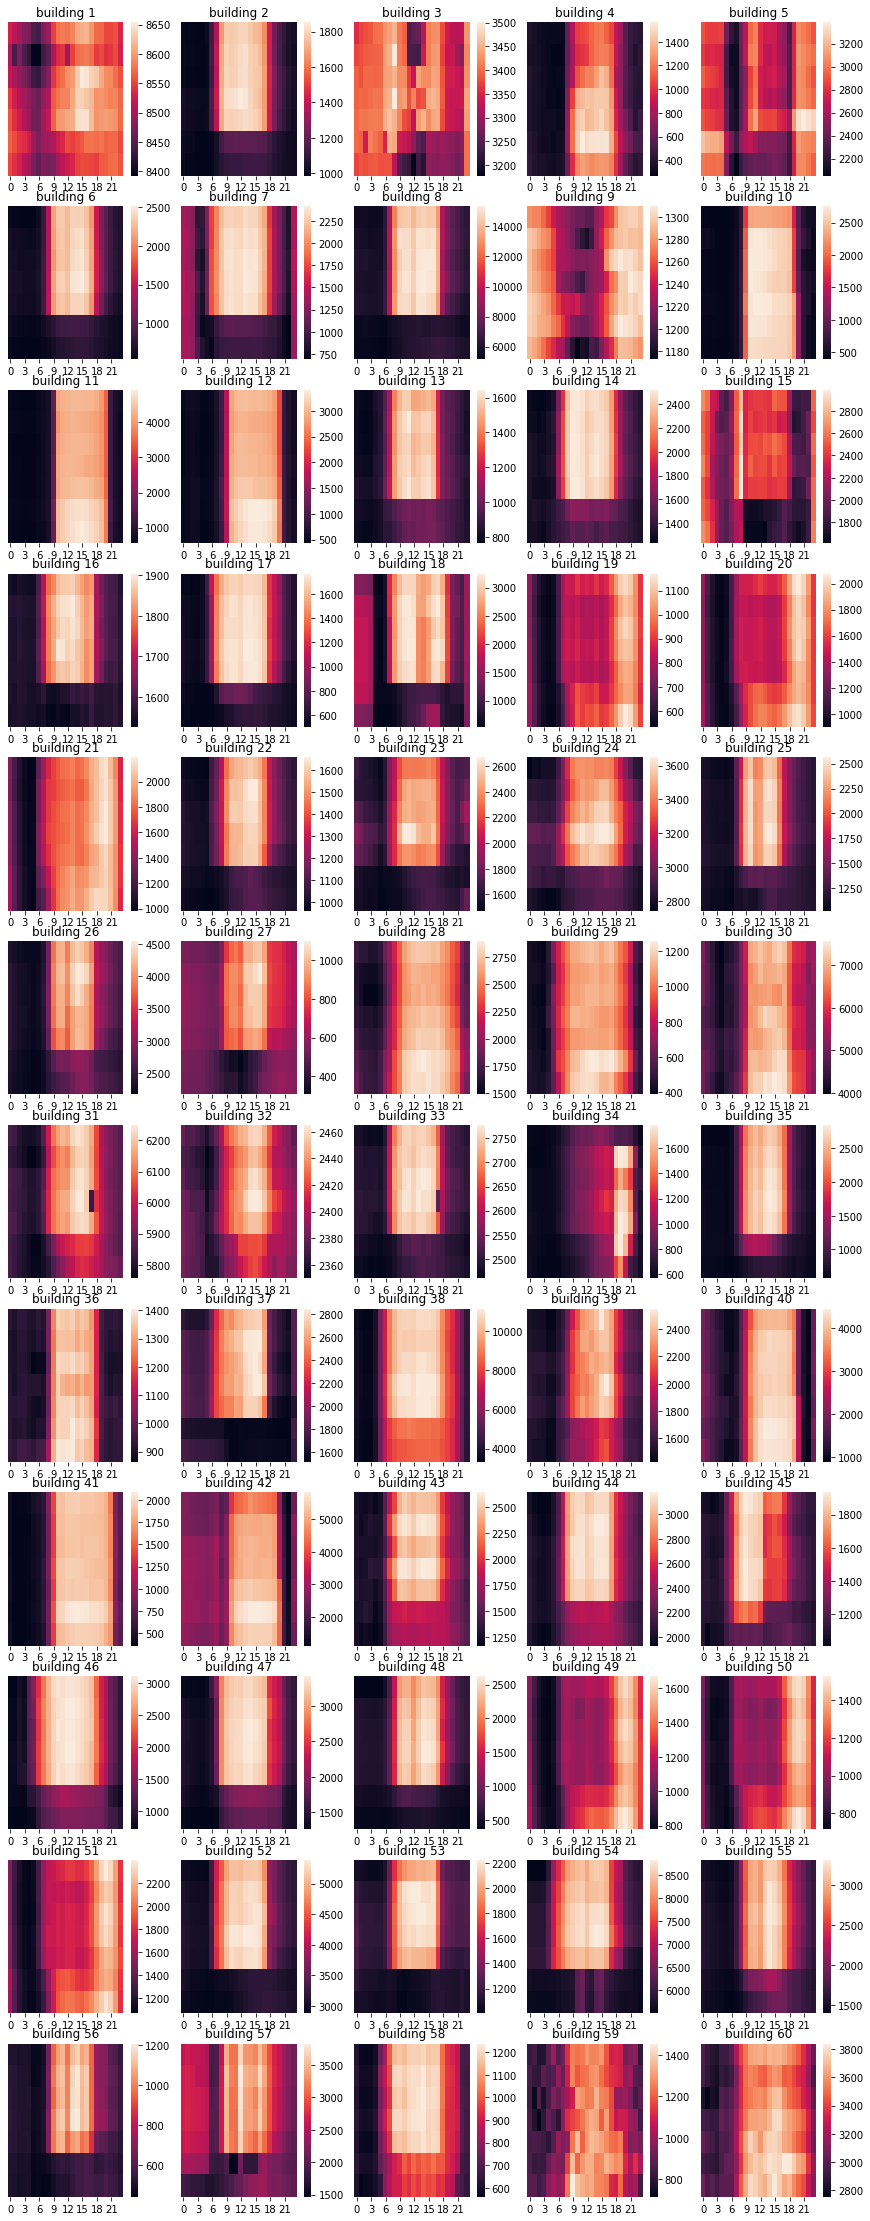

In [25]:
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for num in eda['num'].unique():
    df = eda[eda.num == num]
    df = df.groupby(['weekday', 'hour'])['usage'].mean().reset_index().pivot('weekday', 'hour', 'usage')
    plt.subplot(12, 5, num)
    sns.heatmap(df)
    plt.title(f'building {num}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

* 건물마다 usage의 pattern에 차이가 있음

#✓ K-means clustering

In [26]:
# 건물을 기준으로 하는 data frame 생성
by_weekday = eda.groupby(['num','weekday'])['usage'].median().reset_index().pivot('num','weekday','usage').reset_index()
by_hour = eda.groupby(['num','hour'])['usage'].median().reset_index().pivot('num','hour','usage').reset_index().drop('num', axis = 1)
df = pd.concat([by_weekday, by_hour], axis= 1)
columns = ['num'] + ['day'+str(i) for i in range(7)] + ['hour'+str(i) for i in range(24)]
df.columns = columns

In [27]:
# '전력사용량'이 아닌 '요일과 시간대에 따른 전력 사용량의 경향성'에 따라서만 군집화 할 것이므로, 특수한 scaling이 필요함
# standard scaling
for i in range(len(df)):
    # 요일 별 전력 중앙값에 대해 scaling
    df.iloc[i,1:8] = (df.iloc[i,1:8] - df.iloc[i,1:8].mean())/df.iloc[i,1:8].std()
    # 시간대별 전력 중앙값에 대해 scaling
    df.iloc[i,8:] = (df.iloc[i,8:] - df.iloc[i,8:].mean())/df.iloc[i,8:].std()

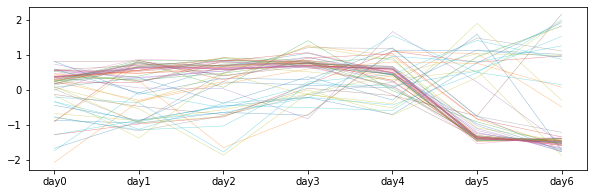

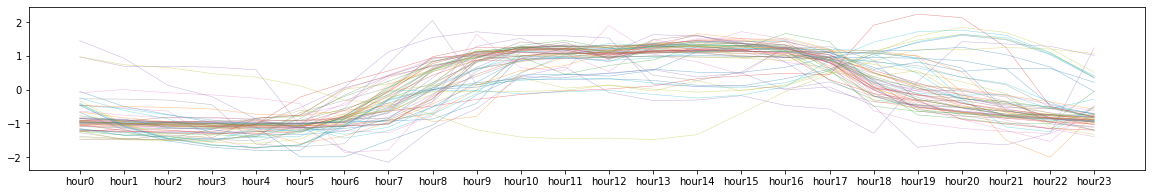

In [28]:
# visualization
fig = plt.figure(figsize = (10,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 1:8], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 8:], alpha = 0.5, linewidth = 0.5)

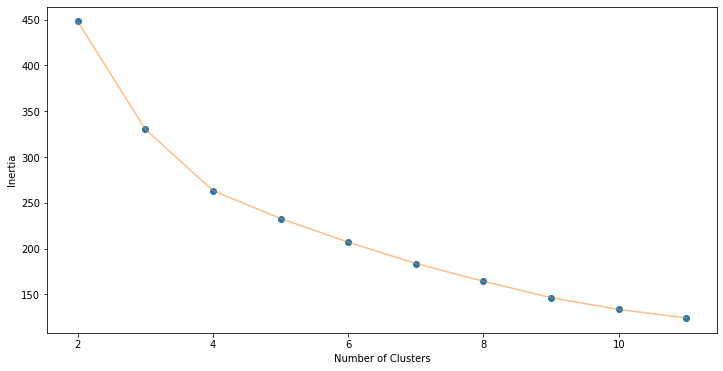

In [29]:
# elbow method를 통해 군집의 개수 결정
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], df.iloc[:,1:])

In [30]:
kmeans = KMeans(n_clusters=4, random_state = 2)
km_cluster = kmeans.fit_predict(df.iloc[:,1:])

In [31]:
df_clust = df.copy()
df_clust['km_cluster'] = km_cluster

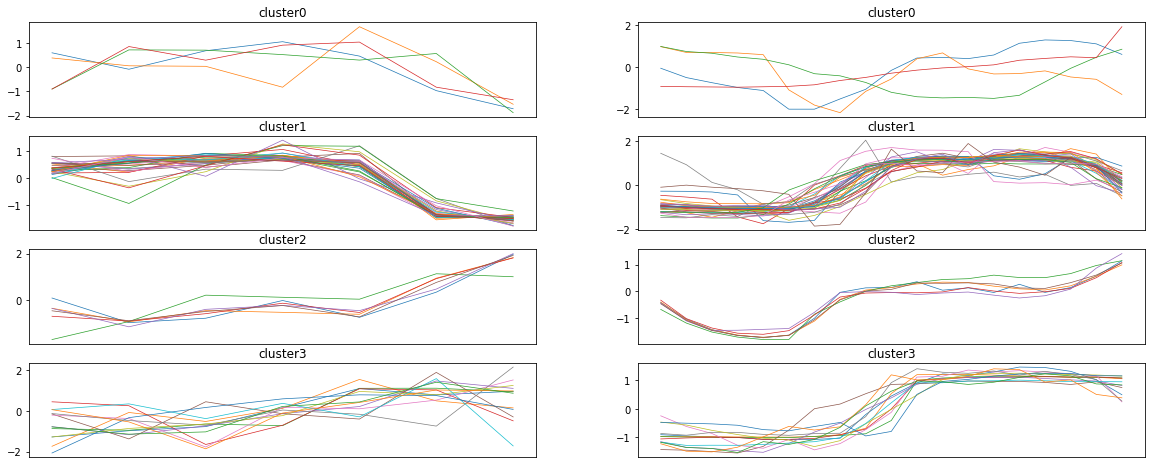

In [32]:
# visualizing result of kmeans clustering
n_c = len(np.unique(df_clust.km_cluster)) 

fig = plt.figure(figsize = (20,8))
for c in range(n_c):
    temp = df_clust[df_clust.km_cluster == c]
    plt.subplot(n_c,2,2*c+1)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,1:8], linewidth=0.7, )
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])
    plt.subplot(n_c,2,2*c+2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,8:-6], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])

In [33]:
eda = eda.merge(df_clust[['num','km_cluster']], on = 'num', how = 'left')

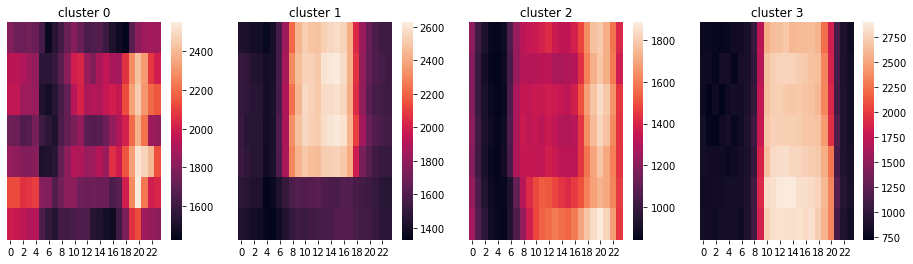

In [34]:
fig = plt.figure(figsize = (20, 4))
for c in range(4):
    temp = eda[eda.km_cluster == c]
    temp = temp.groupby(['weekday', 'hour'])['usage'].median().reset_index().pivot('weekday', 'hour', 'usage')
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f'cluster {c}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

###✓ EDA of cluster

In [35]:
# dictionary mapping cluster and building
match = df_clust[['num','km_cluster']]
clust_to_num = {0:[],1:[],2:[],3:[]}
for i in range(60):
    c = match.iloc[i,1]
    clust_to_num[c].append(i+1)

In [ ]:
# energy usage of each building ~ weekday, hour
fig, axes = plt.subplots(6, 10, figsize = (30 ,14), sharex = True, sharey = False)
axes = axes.flatten()

for num, ax in zip(range(1, 61), axes):
    for i in range(1, 13):
        ax.plot(eda[eda['num'] == num]['usage'][24 * 7 * (i - 1):24 * 7 * i].values)
        ax.set_title(f'건물번호 : {num}')
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (40, 240))
for i in eda['num'].unique():
    num_i = eda[eda.num == i]
    plt.subplot(60, 1, i)
    sns.lineplot(data = num_i, x = 'datetime', y = 'usage', linewidth = 0.3)
    plt.title(f'building {i}')

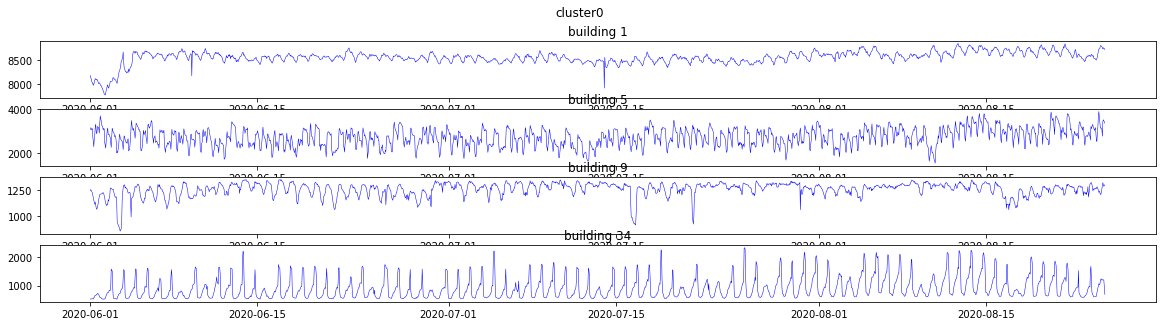

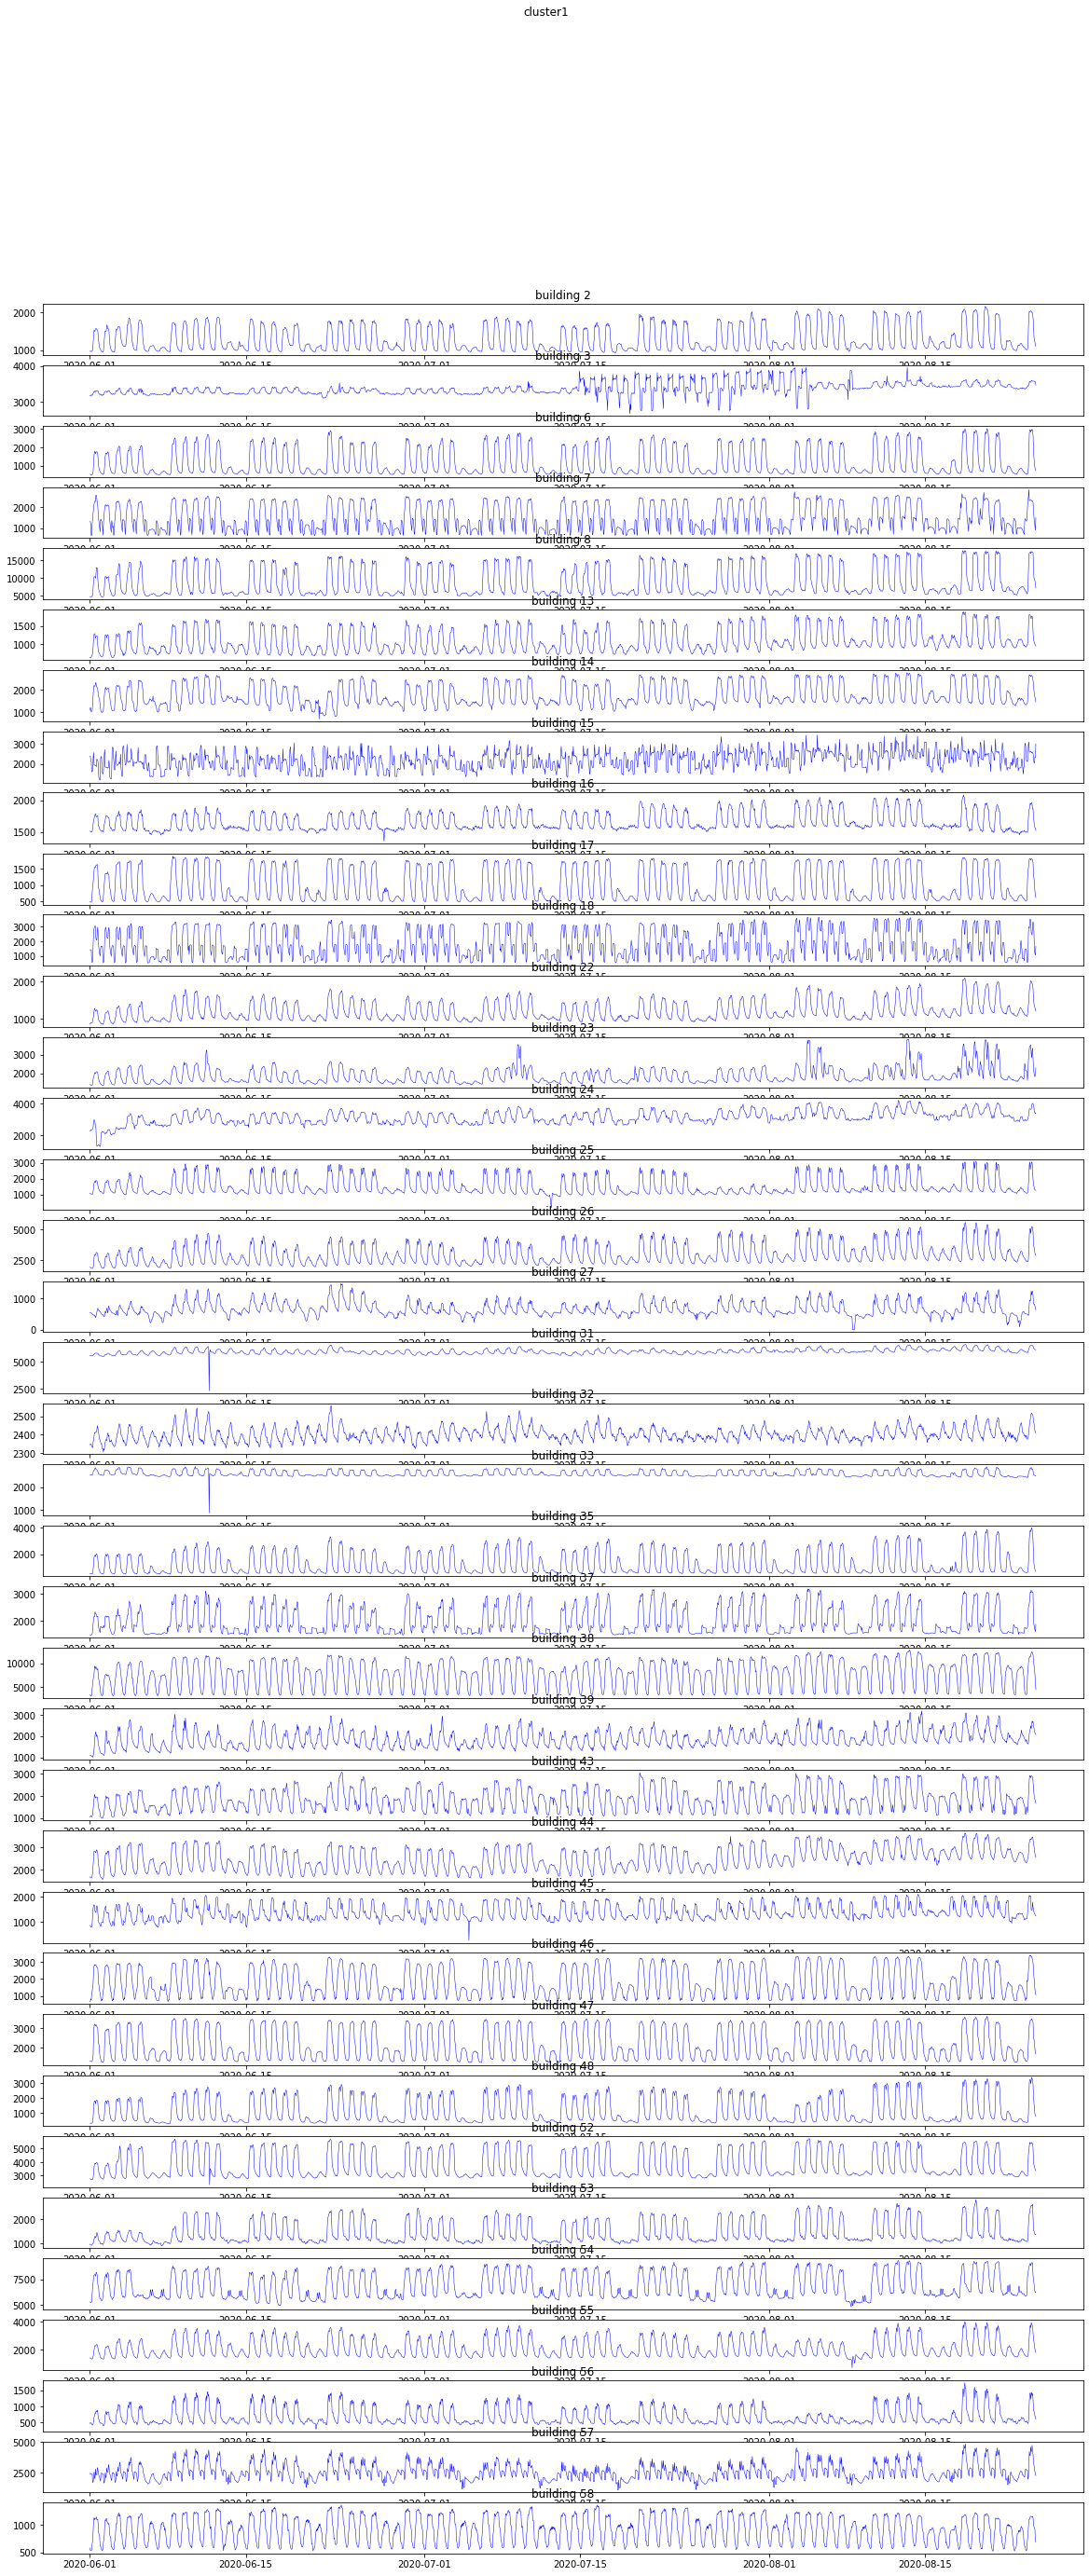

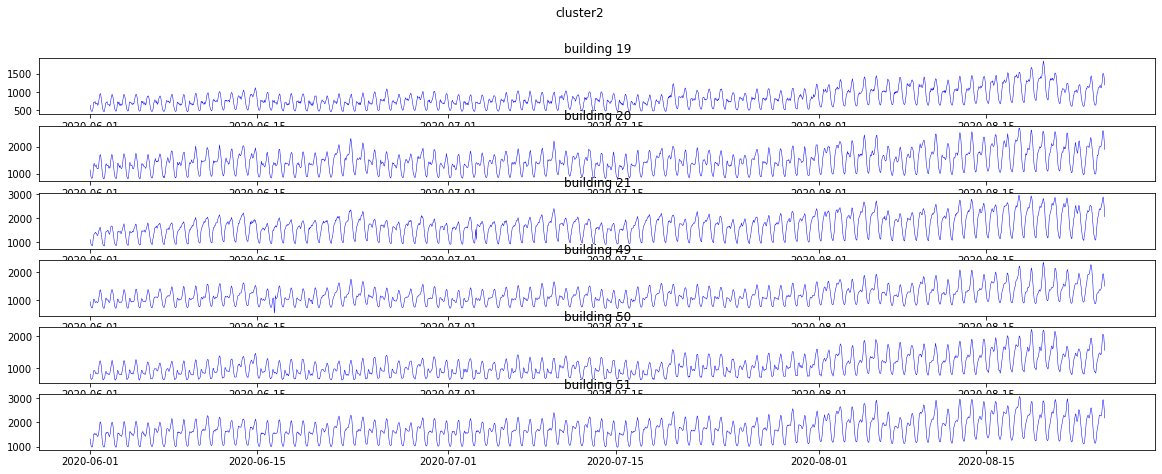

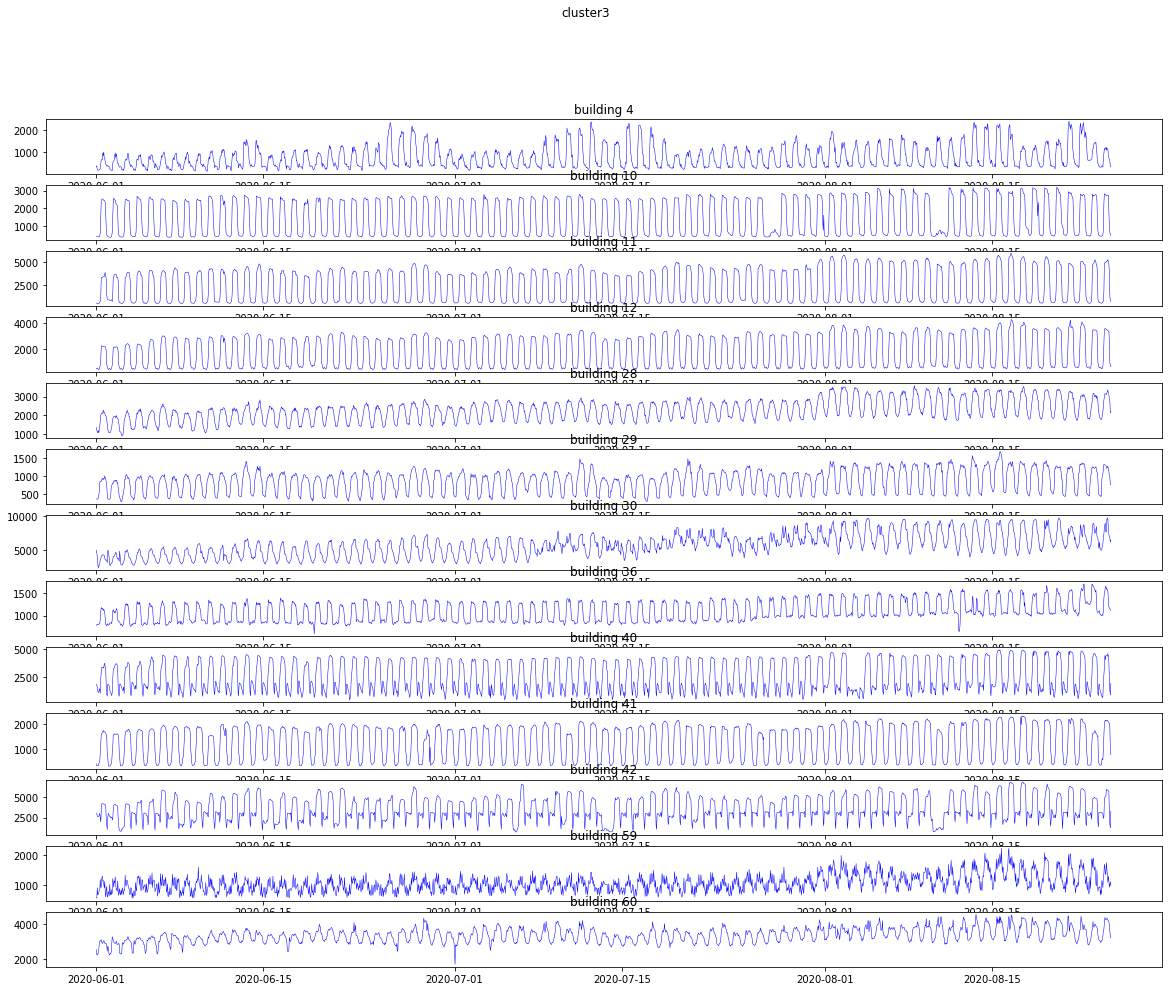

In [36]:
# linplot(energy usage of each building ~ cluster, datetime)
for c in range(4):
    temp_1 = eda[eda.km_cluster == c]
    nums = np.unique(temp_1.num)
    n_nums = len(nums)
    fig = plt.figure(figsize = (20, 1.2*n_nums))
    plt.suptitle(f'cluster{c}')
    for i, num in enumerate(nums):
        temp_2 = temp_1[temp_1.num == num]
        plt.subplot(n_nums,1, i+1)
        sns.lineplot(data = temp_2, x= 'datetime', y = 'usage', linewidth = 0.5, color = 'blue')
        plt.title(f'building {num}')
        plt.ylabel('')
        plt.xlabel('')